# Water Quality

Using dataset from: https://www.kaggle.com/prakharsrivastava01/drinkable-water-dataset

The dataset contains details about the chemical composition of 26 samples of water. The dataset determines whether or not the levels of these chemical elements exceed the acceptable levels for water to be classified as safe or not.

In [147]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Part 1 - Questions

In [148]:
data = pd.read_csv("drinkable_water_dataset.csv")
data.head()

,calcium (60 - 70),magnesium (150 - 500),sodium (16 - 20),copper (1.1 - 1.2),iron (0.1 - 0.2),chlorine (250 -260),Drinkable
0,60,150,20,1.2,0.2,250,1
1,70,500,16,1.1,0.1,260,1
2,30,200,21,1.5,0.1,252,0
3,80,200,17,1.2,0.1,249,1
4,60,20,10,0.5,0.2,270,0


### 1. What would be the best way to handle missing values in this data set? Use that method to handle the missing values.

In [149]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   calcium (60 - 70)      26 non-null     int64  
 1   magnesium (150 - 500)  26 non-null     int64  
 2   sodium (16 - 20)       26 non-null     int64  
 3   copper (1.1 - 1.2)     26 non-null     float64
 4   iron (0.1 - 0.2)       26 non-null     float64
 5   chlorine (250 -260)    26 non-null     int64  
 6   Drinkable              26 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.5 KB
None


In [150]:
data.isna().sum()

calcium (60 - 70)        0
magnesium (150 - 500)    0
sodium (16 - 20)         0
copper (1.1 - 1.2)       0
iron (0.1 - 0.2)         0
chlorine (250 -260)      0
Drinkable                0
dtype: int64

There are no missing values to handle in this data set

### 2. Find out which element in the water is causing the most degradation?

In [151]:
data.describe()

,calcium (60 - 70),magnesium (150 - 500),sodium (16 - 20),copper (1.1 - 1.2),iron (0.1 - 0.2),chlorine (250 -260),Drinkable
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,70.307692,421.846154,27.384615,1.901154,0.926154,320.961538,0.500000
std,18.707794,234.326045,19.384689,1.531964,1.834346,142.708789,0.509902
min,10.000000,20.000000,2.000000,0.500000,0.100000,159.000000,0.000000
25%,63.250000,200.000000,16.250000,1.147500,0.120000,252.000000,0.000000
50%,69.500000,407.000000,19.000000,1.200000,0.200000,259.500000,0.500000
75%,83.750000,603.250000,27.500000,1.750000,0.775000,306.750000,1.000000
max,100.000000,1000.000000,71.000000,7.300000,8.900000,777.000000,1.000000


### 3. Find the correlation of each column with water potability.

In [152]:
data.corr()

,calcium (60 - 70),magnesium (150 - 500),sodium (16 - 20),copper (1.1 - 1.2),iron (0.1 - 0.2),chlorine (250 -260),Drinkable
calcium (60 - 70),1.000000,0.070116,0.541348,0.369231,0.134571,0.329741,-0.188696
magnesium (150 - 500),0.070116,1.000000,0.454925,0.497022,0.461988,0.458954,-0.484084
sodium (16 - 20),0.541348,0.454925,1.000000,0.869753,0.422089,0.321525,-0.517994
copper (1.1 - 1.2),0.369231,0.497022,0.869753,1.000000,0.425794,0.146212,-0.495934
iron (0.1 - 0.2),0.134571,0.461988,0.422089,0.425794,1.000000,0.167695,-0.425943
chlorine (250 -260),0.329741,0.458954,0.321525,0.146212,0.167695,1.000000,-0.524135
Drinkable,-0.188696,-0.484084,-0.517994,-0.495934,-0.425943,-0.524135,1.000000


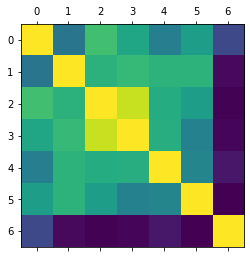

In [153]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())

plt.show()

### 4. Design a model to predict the water potability and also determine it’s accuracy.

In [161]:
feature_cols = ['calcium (60 - 70)', 'magnesium (150 - 500)', 'sodium (16 - 20)',
                'copper (1.1 - 1.2)', 'iron (0.1 - 0.2)', 'chlorine (250 -260)']
X = data[feature_cols]
y = data.Drinkable

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

#Splitting into 70% for training set and 30% for test set

In [163]:
dtclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)

In [164]:
print("Decision Tree has an accuracy of", metrics.accuracy_score(y_test, y_pred))

Decision Tree has an accuracy of 1.0


### 5. Visualize at least three columns using a bar chart and potability using a pie chart.

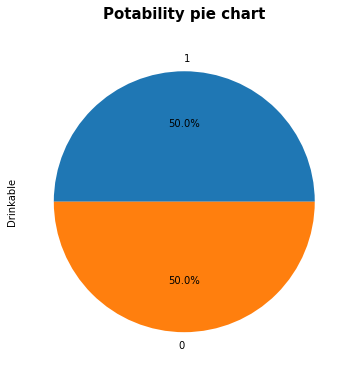

In [165]:
import matplotlib.pyplot as plt

data= pd.read_csv("drinkable_water_dataset.csv")

plt.figure(figsize = (10,6))
data.Drinkable.value_counts().plot.pie(autopct = "%.1f%%")
plt.title('Potability pie chart', pad = 20, fontdict = {'size' : 15, 'color' : 'black', 'weight' : 'bold'})
plt.show()

<AxesSubplot:ylabel='Frequency'>

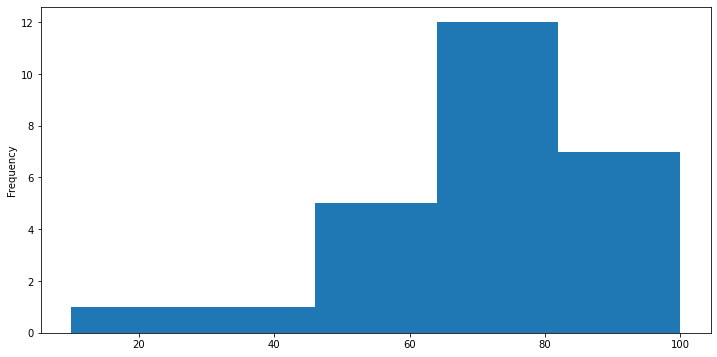

In [166]:
data['calcium (60 - 70)'].plot(kind='hist',bins=5,figsize = (12,6))

<AxesSubplot:ylabel='Frequency'>

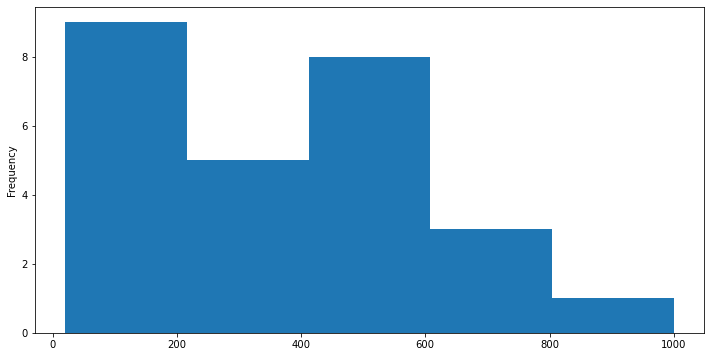

In [167]:
data['magnesium (150 - 500)'].plot(kind='hist',bins=5,figsize = (12,6))

<AxesSubplot:ylabel='Frequency'>

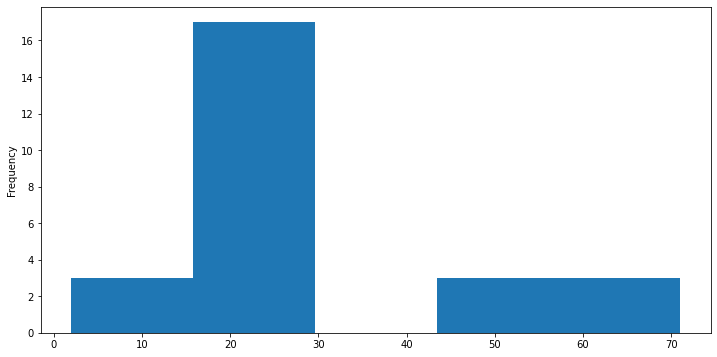

In [168]:
data['sodium (16 - 20)'].plot(kind='hist',bins=5,figsize = (12,6))

<AxesSubplot:ylabel='Frequency'>

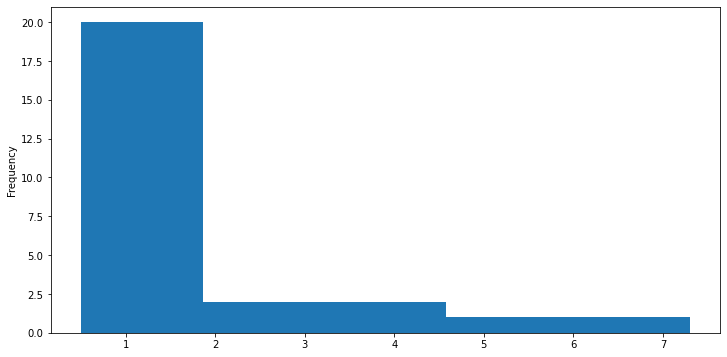

In [169]:
data['copper (1.1 - 1.2)'].plot(kind='hist',bins=5,figsize = (12,6))

<AxesSubplot:ylabel='Frequency'>

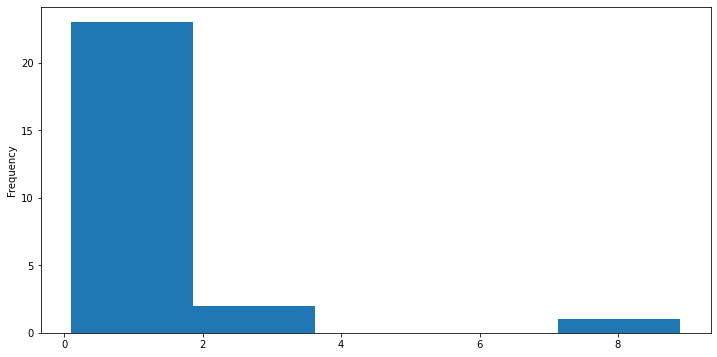

In [170]:
data['iron (0.1 - 0.2)'].plot(kind='hist',bins=5,figsize = (12,6))

<AxesSubplot:ylabel='Frequency'>

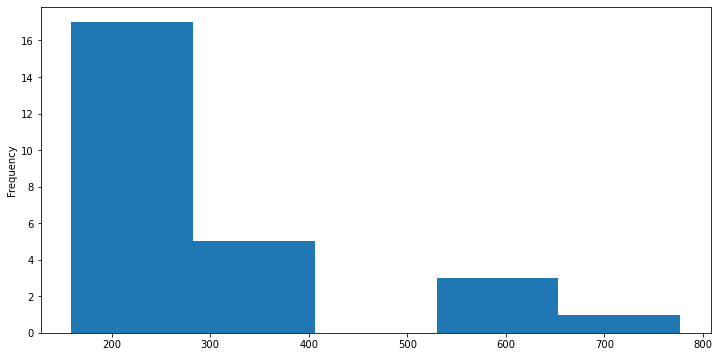

In [171]:
data['chlorine (250 -260)'].plot(kind='hist',bins=5,figsize = (12,6))

### 6. Create a new column named Irregularity that contains the name of all those columns that are making that water not potable. All columns in which water is potable

### 7. Using the column irregularity create a pie chart that shows the percentage of each attribute of water that makes it not potable.

### 8. What levels of irregularity in each column cause the water to become unpotable i.e how much of one element is present before water is declared undrinkable?

In [172]:
data['calcium (60 - 70)'].value_counts().sort_index(ascending=True) 

10     1
30     1
60     2
61     1
62     1
63     1
64     1
65     1
67     1
69     3
70     2
76     1
77     1
80     2
85     2
87     1
89     1
90     2
100    1
Name: calcium (60 - 70), dtype: int64

In [173]:
calcium = data['calcium (60 - 70)']
drinkable = data['Drinkable']
correlation = calcium.corr(drinkable)
print(correlation)

-0.18869624727989645


In [174]:
data['magnesium (150 - 500)'].value_counts().sort_index(ascending=True) 

20      1
150     1
155     1
159     1
167     1
170     1
200     2
206     1
389     1
399     1
400     1
404     1
410     1
499     1
500     1
502     1
555     1
601     1
604     1
605     1
606     1
645     1
690     1
732     1
1000    1
Name: magnesium (150 - 500), dtype: int64

In [175]:
magnesium = data['magnesium (150 - 500)']
drinkable = data['Drinkable']
correlation = magnesium.corr(drinkable)
print(correlation)

-0.4840843558129342


In [176]:
data['sodium (16 - 20)'].value_counts().sort_index(ascending=True) 

2     1
10    1
15    1
16    4
17    3
18    3
20    3
21    1
22    1
23    1
29    1
45    1
55    1
56    1
67    2
71    1
Name: sodium (16 - 20), dtype: int64

In [177]:
sodium = data['sodium (16 - 20)']
drinkable = data['Drinkable']
correlation = sodium.corr(drinkable)
print(correlation)

-0.5179936754825298


In [178]:
data['copper (1.1 - 1.2)'].value_counts().sort_index(ascending=True) 

0.50    1
1.10    5
1.13    1
1.20    9
1.50    2
1.60    1
1.80    1
2.40    1
2.50    1
3.50    1
4.50    1
4.90    1
7.30    1
Name: copper (1.1 - 1.2), dtype: int64

In [179]:
copper = data['sodium (16 - 20)']
drinkable = data['Drinkable']
correlation = copper.corr(drinkable)
print(correlation)

-0.5179936754825298


In [180]:
data['iron (0.1 - 0.2)'].value_counts().sort_index(ascending=True) 

0.10    7
0.18    1
0.20    8
0.40    1
0.50    1
0.70    1
0.80    1
0.90    1
1.40    1
1.80    1
3.00    1
3.20    1
8.90    1
Name: iron (0.1 - 0.2), dtype: int64

In [181]:
iron = data['sodium (16 - 20)']
drinkable = data['Drinkable']
correlation = iron.corr(drinkable)
print(correlation)

-0.5179936754825298


In [182]:
data['chlorine (250 -260)'].value_counts().sort_index(ascending=True) 

159    1
249    1
250    3
251    1
252    2
255    1
257    1
258    1
259    2
260    2
269    1
270    1
289    1
300    1
309    1
321    1
345    1
546    1
598    1
600    1
777    1
Name: chlorine (250 -260), dtype: int64

In [183]:
chlorine = data['chlorine (250 -260)']
drinkable = data['Drinkable']
correlation = chlorine.corr(drinkable)
print(correlation)

-0.5241351598528635


## Part 2 - Decision Tree

Using dataset from: https://www.kaggle.com/adityakadiwal/water-potability

In [184]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [185]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [186]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are null values in ph column, sulfate column, trihalomethanes column and turbidity column. To handle these, missing columns will be filled with mean value of that particular column. 

In [187]:
df.ph.fillna(df['ph'].mean(),inplace=True)
df.Sulfate.fillna(df['Sulfate'].mean(),inplace=True)
df.Trihalomethanes.fillna(df['Trihalomethanes'].mean(),inplace=True)

In [188]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [189]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [199]:
feature_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_cols]
y = df.Potability

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=360) 

#Splitting into 70% for training set and 30% for test set

In [201]:
dtclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)

In [202]:
print("Decision Tree has an accuracy of", metrics.accuracy_score(y_test, y_pred))

Decision Tree has an accuracy of 0.6541200406917599
